In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
X = np.array([[1, 2], [2, 3], [2, 1], [3, 3], [3, 4], [4, 3]])
y = np.array([-1, -1, -1, 1, 1, 1])
learning_rate = 0.01
epochs = 1000
w = np.zeros(X.shape[1])
b = 0

In [13]:
def polynomial_kernel(x1, x2, degree=2):
    return (np.dot(x1, x2) + 1) ** degree
for epoch in range(epochs):
    for i, x in enumerate(X):
        prediction = np.dot(w, x) + b
        if y[i] * prediction <= 1:
            w = w + learning_rate * (y[i] * x - 2 * w)
            b = b + learning_rate * y[i]

In [14]:
def predict(x):
    return np.sign(np.dot(w, x) + b)
correct_predictions = 0
for i, x in enumerate(X):
    if predict(x) == y[i]:
        correct_predictions += 1
accuracy = correct_predictions / len(X)
print(f"Accuracy on the training data: {accuracy * 100:.2f}%")

Accuracy on the training data: 83.33%


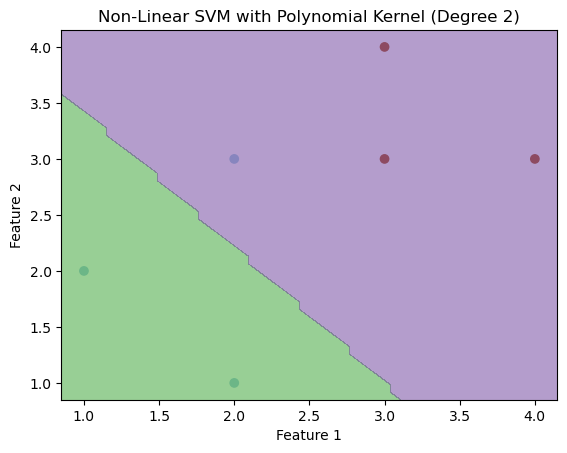

In [15]:
def plot_decision_boundary(X, y, w, b, degree=2):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = np.zeros_like(xx)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([xx[i, j], yy[i, j]])
            Z[i, j] = predict(point)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Non-Linear SVM with Polynomial Kernel (Degree {degree})')
    plt.show()
plot_decision_boundary(X, y, w, b, degree=2)